# Importing Header and SoilPrep

In [1]:
import import_ipynb 
from Header import *

import import_ipynb
from SoilPrep import *

importing Jupyter notebook from Header.ipynb
importing Jupyter notebook from SoilPrep.ipynb


## Loading Data, MetaData, and Mtree 

In [2]:
with open ('meta_data.pickle', 'rb') as file:
    MetaData = pickle.load(file)

sg_filters = MetaData['sg_filters']
window_lengths = MetaData['window_lengths']
prepare_spec = MetaData['prepare_spec']
nbands_sampling = MetaData['nbands_sampling']
target_names = MetaData['target_names']
prepare_target = MetaData['prepare_target']
ml_methods = MetaData['ml_methods']


with open ('data.pickle', 'rb') as file:
    Data = pickle.load(file)

spectra = Data['spectra']
T = Data['T']
NT = Data['NT']
smth_spec = Data['smth_spec']
fod_spec = Data['fod_spec']
cr_spec = Data['cr_spec'] 
log_spec = Data['log_spec']
sampled_spec = Data['sampled_spec']
sampled_cr = Data['sampled_cr']
sampled_fod = Data['sampled_fod']
fod_sampled= Data['fod_sampled']
sampled_log = Data['sampled_log'] 
rand_t = Data['rand_t']
rand_nt = Data['rand_nt'] 


with open ('Mtree.pickle', 'rb') as file:
    Mtree = pickle.load(file)

 #  Best Models for Sand, Silt, Clay, TOC, and CaCO3..

In [7]:
feature_scores = {}

model_details ={}

##  Sand 

Sand -> [ iqrp - **3.05**, r2 - **0.69**, Spec - none, n_bands - 50, Tar - none] :   **cubist**   <br/><br/>
***Description***: We get the best model for sand when we use cubist method. \
While training the model we utilize the smoothed spectra resampled to 50 bands and
sand values are used without any preprocessing.


Sand -> [ iqrp - **3.05**, r2 - **0.69**, Spec - fod, n_bands - 24, Tar - minmax] :   **gbrt**   <br/><br/>
***Description***: We get the best model for sand when we use gbrt method. \
While training the model we utilize the smoothed fod spectra resampled to 24 bands and
sand values are used with minmax normalization.

In [8]:
sand_model_cubist = Cubist(n_rules = 50, n_committees = 5, random_state = 42) 
sand_model_cubist.fit(sampled_spec[50], T[0])

C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}


Cubist(n_committees=5, n_rules=50, random_state=42)

In [9]:
sampled_spec[50].head(1)

,471,512,553,594,635,676,717,758,799,840,881,922,963,1004,1045,1086,1127,1168,1209,1250,1291,1332,1373,1414,1455,1496,1537,1578,1619,1660,1701,1742,1783,1824,1865,1906,1947,1988,2029,2070,2111,2152,2193,2234,2275,2316,2357,2398,2439,2480
0,0.065518,0.080202,0.113403,0.165125,0.198475,0.2264,0.25675,0.282425,0.29905,0.30945,0.3189,0.3309,0.345,0.360275,0.3753,0.390125,0.402675,0.413175,0.421875,0.4292,0.4341,0.436675,0.431225,0.399075,0.413375,0.42825,0.440925,0.44875,0.454,0.45855,0.46225,0.463,0.465925,0.46915,0.45905,0.35295,0.355775,0.3959,0.432425,0.45385,0.467725,0.462925,0.43035,0.4346,0.43735,0.4252,0.4079,0.38775,0.359375,0.330325


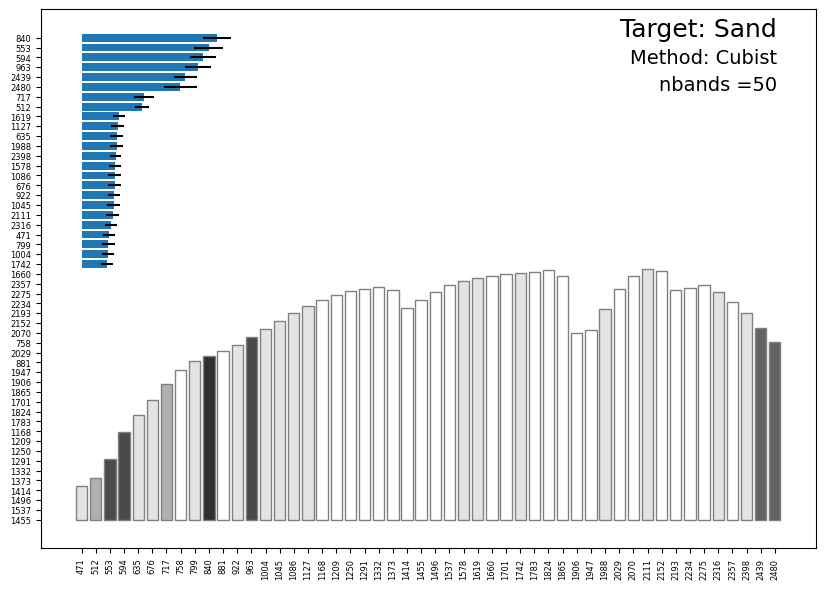

In [10]:
feature_scores['Sand'] = permutation_importance(sand_model_cubist, sampled_spec[50], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'Cubist', 'spec': sampled_spec[50], 'spec_proc': 'spectra', 'n_bands': 50}
show_important_features_for ('Sand', model_details, feature_scores, 10, 50, 1)

In [11]:
# Sand -> [ iqrp - 3.05, r2 - 0.69, Spec - fod, n_bands - 24, Tar - minmax] : gbrt

sand_model_gbrt = GradientBoostingRegressor()  
sand_model_gbrt.fit(sampled_fod[24], T[0])

GradientBoostingRegressor()

In [12]:
sampled_fod[24].head(1)

,493,579,664,749,835,920,1006,1091,1177,1262,1347,1433,1518,1604,1689,1774,1860,1945,2031,2116,2202,2287,2372,2458
0,0.000392,0.001115,0.000702,0.000562,0.00024,0.000315,0.000369,0.000331,0.000222,0.000129,-0.000167,0.000016,0.000306,0.000127,0.000071,0.000063,-0.001421,0.000583,0.0007,0.000036,-0.000236,-0.000194,-0.000482,-0.000708


In [13]:
feature_scores['Sand'] = permutation_importance(sand_model_gbrt, sampled_fod[24], T[0], n_repeats=20, random_state=0)

model_details['Sand'] = {'method': 'gbrt', 'spec': sampled_fod[24], 'spec_proc': 'fod', 'n_bands': 24}

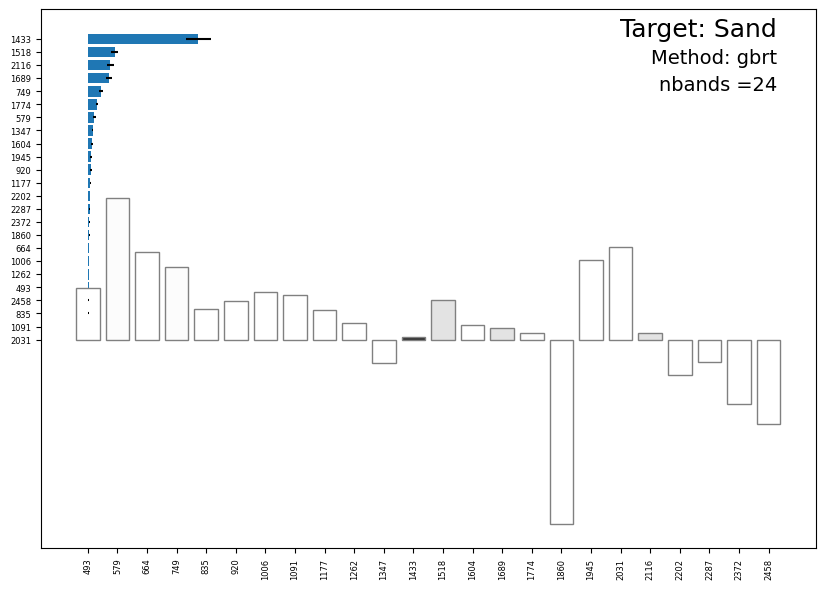

In [14]:
show_important_features_for ('Sand', model_details, feature_scores, 10, 9000, 1)

###  Silt 

In [15]:
# For:Silt-> ['r2', 0.5, 'Spec:', 'fod2', 'bands:', 12, 'Tar:', 'none'] :randomforest

Silt -> [ iqrp - **2.04**, r2 - **0.5**, Spec - fod2, n_bands - 12, Tar - none] :   **random**  <br/><br/>
***Description***: We get the best model for silt when we use randomforest method. \
While training the model we utilize the first order derivative (of the smoothed spectra which is resampled to 12 bands) and
silt values are used without any preprocessing.

In [16]:
silt_model_rand = RandomForestRegressor(random_state= 23)
silt_model_rand.fit(fod_sampled[12], T[1])

RandomForestRegressor(random_state=23)

In [17]:
fod_sampled[12].head(1)

,536,707,878,1048,1219,1390,1561,1732,1903,2073,2244,2415
0,0.138343,0.071841,0.056476,0.046741,-0.002,0.022871,0.019518,-0.061659,0.047141,-0.014553,-0.060688,-0.060688


In [18]:
feature_scores['Silt'] = permutation_importance(silt_model_rand, fod_sampled[12], T[1], n_repeats=20, random_state=0)

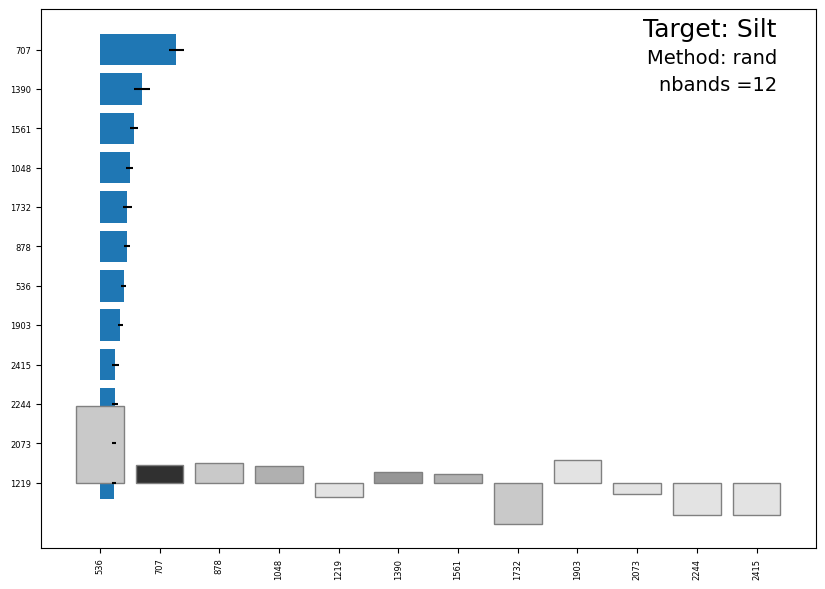

In [19]:
model_details['Silt'] = {'method': 'rand', 'spec': fod_sampled[12], 'spec_proc': 'fod2', 'n_bands': 12}

show_important_features_for ('Silt', model_details, feature_scores, 5, 10, 5)

##  Clay

Clay -> [ iqrp - **2.99**, r2 - **0.77**, Spec - log, n_bands - 15, Tar - minmax] :   **mult**   <br/><br/>
***Description***: We get the best model for clay when we use mult (multiple linear regression) method. \
While training the model we utilize the inverse logarithmic reflectance (1/logR) of the smoothed spectra which is resampled to 15 bands and clay values are used by  normalizing it in the range of 0-10.

Clay -> [ iqrp - **2.97**, r2 - **0.77**, Spec - continuum, n_bands - 30, Tar - minmax] :   **gbrt**   <br/><br/>
***Description***: We get the best model for clay when we use mult (multiple linear regression) method. \
While training the model we utilize the continum removed smoothed spectra which is resampled to 30 bands and clay values are used by  normalizing it in the range of 0-10.

In [20]:
clay_model_mult = linear_model.LinearRegression()
clay_model_mult.fit(sampled_log[15], NT[2])

LinearRegression()

In [21]:
sampled_log[15].head(1)

,519,656,792,929,1066,1202,1339,1476,1612,1749,1886,2022,2159,2295,2432
0,2.420115,1.556326,1.225854,1.09747,0.961566,0.867871,0.841234,0.869084,0.792377,0.767627,0.909422,0.866668,0.796801,0.847628,1.014666


In [22]:
feature_scores['Clay'] = permutation_importance(clay_model_mult, sampled_log[15], NT[2], n_repeats=20, random_state=0)

model_details['Clay'] = {'method': 'mult', 'spec': sampled_log[15], 'spec_proc': 'log', 'n_bands': 15}

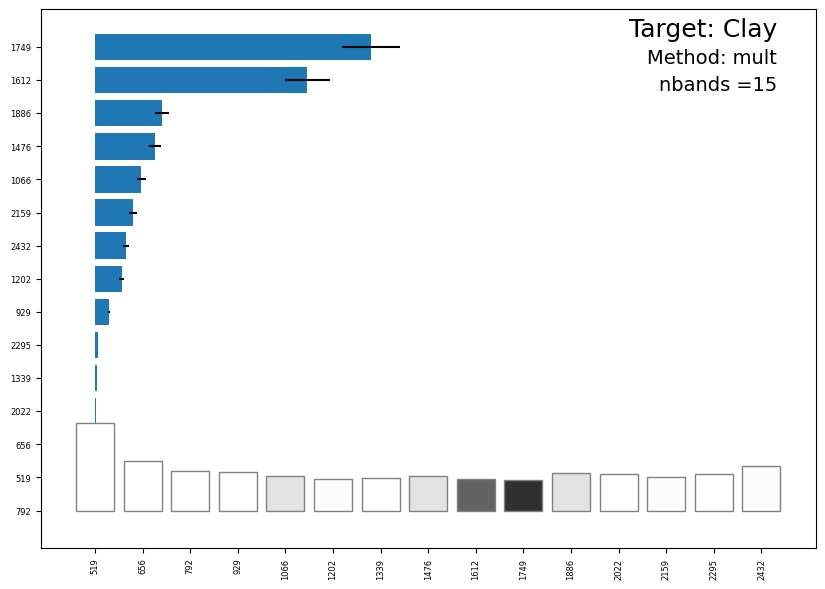

In [23]:
show_important_features_for ('Clay', model_details, feature_scores, 0.001, 1, 2)

In [24]:
# For:Clay-> ['r2', 0.77, 'Spec:', 'continuum', 'bands:', 30, 'Tar:', 'minmax'] :gbrt
clay_model_gbrt = GradientBoostingRegressor()
clay_model_gbrt.fit(sampled_cr[30], NT[2])

GradientBoostingRegressor()

In [25]:
sampled_cr[30].head(1)

,485,553,621,690,758,826,895,963,1031,1100,1168,1236,1305,1373,1441,1510,1578,1646,1715,1783,1851,1920,1988,2056,2125,2193,2261,2330,2398,2466
0,0.016043,0.022592,0.00143,0.001614,0.00038,0.002251,0.007303,0.006758,0.003065,0.000578,0.000473,0.000415,0.000498,0.012874,0.038887,0.017028,0.005895,0.002172,0.00119,0.002048,0.007375,0.120191,0.076237,0.02543,0.004227,0.024841,0.00506,0.000795,0.001311,0.004379


In [26]:
feature_scores['Clay'] = permutation_importance(clay_model_gbrt, sampled_cr[30], NT[2], n_repeats=20, random_state=0)

model_details['Clay'] = {'method': 'gbrt', 'spec': sampled_cr[30], 'spec_proc': 'continuum', 'n_bands': 30}

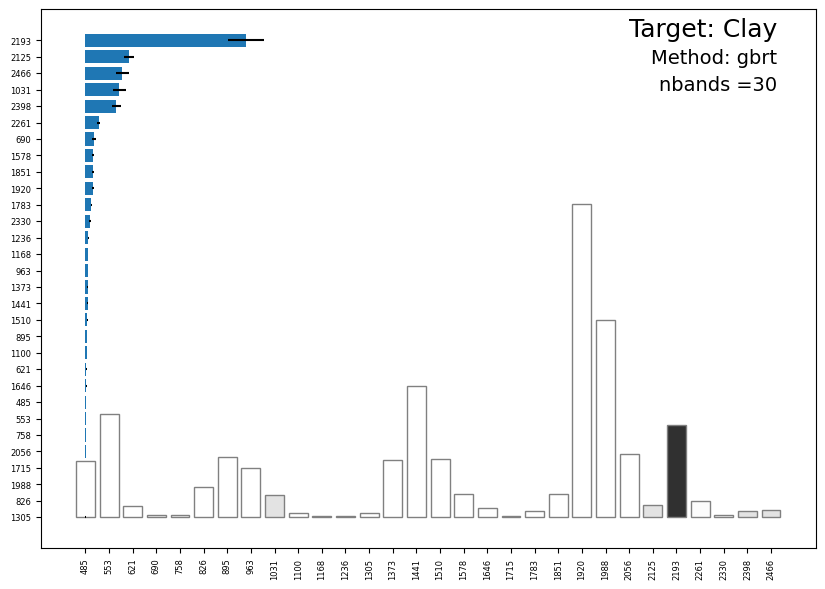

In [27]:
show_important_features_for ('Clay', model_details, feature_scores, 20, 150, 2)

##  TOC 

In [28]:
# For:TOC-> ['iqrp', 2.51, 'Spec:', 'fod2', 'bands:', 40, 'Tar:', 'minmax'] :gbrt
# For:TOC-> ['r2', 0.81, 'Spec:', 'fod2', 'bands:', 40, 'Tar:', 'minmax'] :gbrt

TOC -> [ iqrp - **2.51**, r2 - **0.81**, Spec - fod2, n_bands - 40, Tar - minmax] :   **gbrt**  <br/><br/>
***Description***: We get the best model for TOC when we use gbrt (gradient boosted regression tree) method. \
While training the model we utilize the fod (of the smoothed spectra which is resampled to 55 bands) and
TOC values are used by  normalizing it in the range of 0-10.

In [29]:
TOC_model_gbrt = GradientBoostingRegressor() 
TOC_model_gbrt.fit(fod_sampled[40], NT[3])

GradientBoostingRegressor()

In [30]:
fod_sampled[40].head(1)

,476,527,579,630,681,732,784,835,886,937,989,1040,1091,1142,1194,1245,1296,1347,1399,1450,1501,1552,1604,1655,1706,1757,1809,1860,1911,1962,2014,2065,2116,2167,2219,2270,2321,2372,2424,2475
0,0.022896,0.056902,0.04832,0.03512,0.03674,0.0269,0.01454,0.01196,0.01566,0.0186,0.019,0.01812,0.0151,0.01208,0.00952,0.00612,0.00206,-0.02704,0.00142,0.01904,0.01422,0.00802,0.0058,0.0044,0.00156,0.0038,-0.0064,-0.111,0.01984,0.05028,0.0311,0.01714,-0.0168,-0.0236,0.00924,-0.0143,-0.02298,-0.02908,-0.0376,-0.0376


In [31]:
feature_scores['TOC'] = permutation_importance(TOC_model_gbrt, fod_sampled[40], NT[3], n_repeats=20, random_state=0)

model_details['TOC'] = {'method': 'gbrt', 'spec': fod_sampled[40], 'spec_proc': 'fod2', 'n_bands': 40}

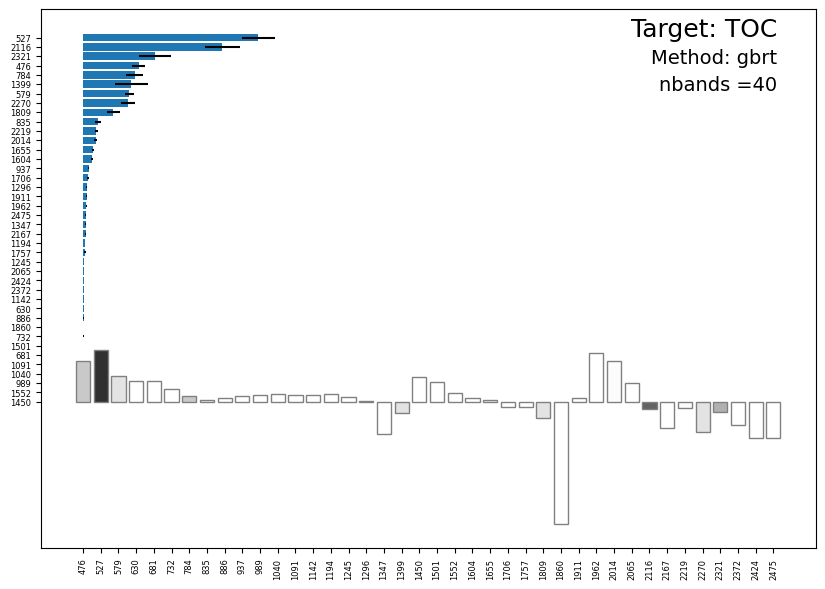

In [32]:
show_important_features_for ('TOC', model_details, feature_scores, 50, 70, 55)

##  CaCO3 

In [33]:
#For:CaCO3-> ['iqrp', 2.32, 'Spec:', 'none', 'bands:', 3, 'Tar:', 'none'] :gbrt
#For:CaCO3-> ['r2', 0.6, 'Spec:', 'none', 'bands:', 3, 'Tar:', 'none'] :gbrt

CaCO3 -> [ iqrp - **2.32**, r2 - **0.6**, Spec - none, n_bands - 3, Tar - none] :   **gbrt**  <br/><br/>
***Description***: We get the best model for CaCO3 when we use gbrt (gradient boosted regression tree ) method. \
While training the model we utilize the smoothed spectra which is resampled to 3 bands and
CaCO3 values are used without any preprocessing.

In [34]:
CaCO3_model_gbrt = GradientBoostingRegressor()
CaCO3_model_gbrt.fit(sampled_spec[3], T[4])

GradientBoostingRegressor()

In [35]:
sampled_spec[3].head(1)

,792,1476,2159
0,0.263038,0.437562,0.414411


In [36]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_gbrt, sampled_spec[3], T[4], n_repeats=20, random_state=0)

model_details['CaCO3'] = {'method': 'gbrt', 'spec': sampled_spec[3], 'spec_proc': 'spectra', 'n_bands': 3}

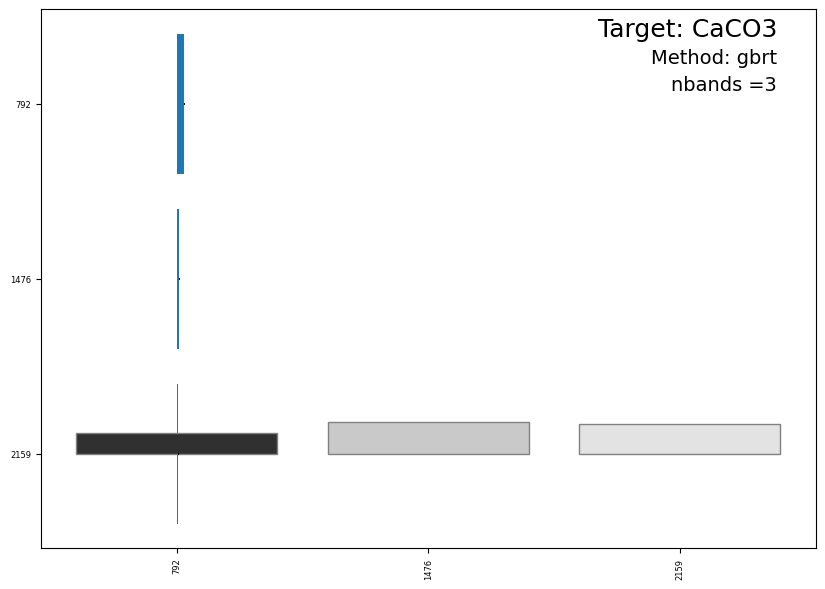

In [37]:
show_important_features_for ('CaCO3', model_details, feature_scores, 0.02, 0.5, 3)

In [38]:
ipywidgets.interact(show_important_features_for, tar = target_names, model_details = [model_details], 
                    feature_scores = [feature_scores], r_factor = (0,100,0.01), X_factor = (0,1000,1), sample = (0,50,1))
                    


interactive(children=(Dropdown(description='tar', options=('Sand', 'Silt', 'Clay', 'TOC', 'CaCO3'), value='San…

<function __main__.show_important_features_for(tar, model_details, feature_scores, r_factor, X_factor, sample)>